### Upload Required Libraries

In [178]:
import numpy as np   
import pandas as pd    

import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
#import matplotlib.style

### Importing data

In [179]:
# reading the CSV file into pandas dataframe
df = pd.read_excel("food.xlsx")

### EDA

In [180]:
# Check top few records to get a feel of the data structure
df.head()

,id,week,final_price,unit_price,website_homepage_mention,food_category,cuisine,home_delivery,night_service,area_range,orders
0,2102001,122.0,150.35,152.35,0.0,Beverages,Italian,1.0,1,7.0,972
1,2102002,95.0,484.03,485.03,0.0,Desert,Indian,0.0,1,5.6,150
2,2102003,52.0,281.33,281.33,0.0,Starters,Italian,0.0,1,3.0,55
3,2102004,10.0,167.81,196.94,0.0,Extras,Italian,1.0,1,4.0,256
4,2102005,122.0,212.46,256.14,0.0,Salad,Italian,0.0,1,3.4,82



#### Shape

In [181]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  4000 
no. of columns:  11


In [182]:
# drop the id column as it is useless for the model
df = df.drop('id', axis=1)

In [183]:
df.head()

,week,final_price,unit_price,website_homepage_mention,food_category,cuisine,home_delivery,night_service,area_range,orders
0,122.0,150.35,152.35,0.0,Beverages,Italian,1.0,1,7.0,972
1,95.0,484.03,485.03,0.0,Desert,Indian,0.0,1,5.6,150
2,52.0,281.33,281.33,0.0,Starters,Italian,0.0,1,3.0,55
3,10.0,167.81,196.94,0.0,Extras,Italian,1.0,1,4.0,256
4,122.0,212.46,256.14,0.0,Salad,Italian,0.0,1,3.4,82


#### Info

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   week                      3981 non-null   float64
 1   final_price               3987 non-null   float64
 2   unit_price                4000 non-null   float64
 3   website_homepage_mention  3980 non-null   float64
 4   food_category             3980 non-null   object 
 5   cuisine                   4000 non-null   object 
 6   home_delivery             3960 non-null   float64
 7   night_service             4000 non-null   int64  
 8   area_range                3976 non-null   float64
 9   orders                    4000 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 312.6+ KB


#### checking for Possible columns which are categorical but are not having data type "object"

In [185]:
df['website_homepage_mention'].value_counts()

0.0    3643
1.0     337
Name: website_homepage_mention, dtype: int64

In [186]:
df['home_delivery'].value_counts()

0.0    2356
1.0    1604
Name: home_delivery, dtype: int64

In [187]:
df['night_service'].value_counts()

0    2007
1    1993
Name: night_service, dtype: int64

In [188]:
cat=["website_homepage_mention","home_delivery","night_service"]

In [189]:
for i in cat:
    df[i]=df[i].astype("object")

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   week                      3981 non-null   float64
 1   final_price               3987 non-null   float64
 2   unit_price                4000 non-null   float64
 3   website_homepage_mention  3980 non-null   object 
 4   food_category             3980 non-null   object 
 5   cuisine                   4000 non-null   object 
 6   home_delivery             3960 non-null   object 
 7   night_service             4000 non-null   object 
 8   area_range                3976 non-null   float64
 9   orders                    4000 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 312.6+ KB


#### Making different list for categorical columns and numerical columns


In [191]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

    

['website_homepage_mention', 'food_category', 'cuisine', 'home_delivery', 'night_service']
['week', 'final_price', 'unit_price', 'area_range', 'orders']


#### Describe for numerical and categorical columns

In [192]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
week,3981.0,74.818890,41.949720,1.00,38.00,76.00,111.00,145.00
final_price,3987.0,335.602666,152.638684,76.69,232.83,304.64,445.23,767.33
unit_price,4000.0,357.496720,160.348496,92.15,243.50,313.31,466.63,767.33
area_range,3976.0,4.107897,1.096252,0.90,3.60,4.00,4.50,7.00
orders,4000.0,257.090250,414.932322,13.00,54.00,135.00,312.00,12489.00


In [193]:
df[cat].describe().T

,count,unique,top,freq
website_homepage_mention,3980.0,2.0,0.0,3643.0
food_category,3980,14,Beverages,1131
cuisine,4000,3,Italian,2064
home_delivery,3960.0,2.0,0.0,2356.0
night_service,4000,2,0,2007


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Orders Distribution Plot'}, xlabel='orders', ylabel='Density'>

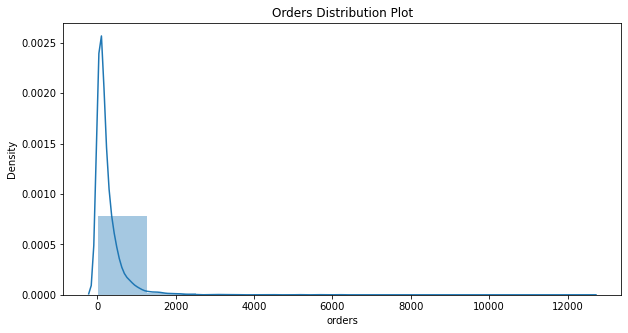

In [194]:
#Visualizing the distribution of orders
plt.figure(figsize=(10,5))

plt.title('Orders Distribution Plot')
sns.distplot(df['orders'],bins = 10)

* Dependent variable orders is showing right skewed distribution

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Log form of orders Distribution Plot'}, xlabel='orders', ylabel='Density'>

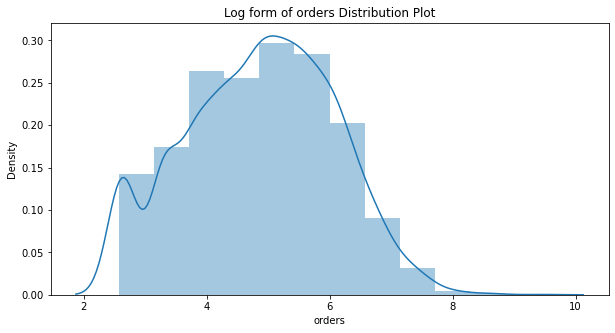

In [195]:
#Visualizing the distribution of orders
plt.figure(figsize=(10,5))

plt.title('Log form of orders Distribution Plot')
sns.distplot(np.log(df['orders']),bins=12)

**log of orders addresses skewness in distribution 

### unique values for categorical variables

In [196]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

WEBSITE_HOMEPAGE_MENTION :  2
1.0     337
0.0    3643
Name: website_homepage_mention, dtype: int64


FOOD_CATEGORY :  14
Fish              96
Extras           105
Soup             112
Biryani          194
Seafood          228
Salad            241
Pasta            246
Starters         255
Other Snacks     261
Desert           269
Sandwich         270
Rice Bowl        277
Pizza            295
Beverages       1131
Name: food_category, dtype: int64


CUISINE :  3
Continental     931
Indian         1005
Italian        2064
Name: cuisine, dtype: int64


HOME_DELIVERY :  2
1.0    1604
0.0    2356
Name: home_delivery, dtype: int64


NIGHT_SERVICE :  2
1    1993
0    2007
Name: night_service, dtype: int64




#### Fish & Seafood belongs to same category

In [197]:
df['food_category'] = df['food_category'].replace({'Fish': 'Seafood'})

In [198]:
df['food_category'].value_counts()

Beverages       1131
Seafood          324
Pizza            295
Rice Bowl        277
Sandwich         270
Desert           269
Other Snacks     261
Starters         255
Pasta            246
Salad            241
Biryani          194
Soup             112
Extras           105
Name: food_category, dtype: int64

In [199]:
# Are there any missing values ?
df.isnull().sum()

week                        19
final_price                 13
unit_price                   0
website_homepage_mention    20
food_category               20
cuisine                      0
home_delivery               40
night_service                0
area_range                  24
orders                       0
dtype: int64

In [200]:
df.week.mode()

0    35.0
dtype: float64

In [201]:
df.week=df.week.fillna(35.0)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='final_price'>

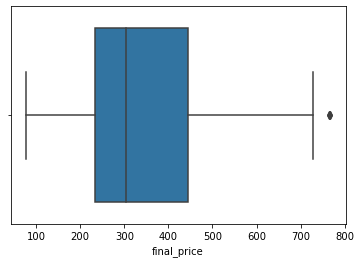

In [202]:
sns.boxplot(df.final_price)

#### since small amount of possible outliers are present here, we will use median to impute null values.


In [203]:
df.final_price.median()

304.64

In [204]:
df[df.final_price.isnull()]

,week,final_price,unit_price,website_homepage_mention,food_category,cuisine,home_delivery,night_service,area_range,orders
169,35.0,NaN,465.63,0.0,Beverages,Continental,0.0,1,3.9,26
377,35.0,NaN,94.12,0.0,Beverages,Italian,1.0,1,4.0,447
1111,35.0,NaN,149.38,0.0,Beverages,Italian,1.0,0,4.5,1216
1461,35.0,NaN,280.33,0.0,Starters,Italian,0.0,1,3.8,68
1789,35.0,NaN,290.03,0.0,Starters,Italian,0.0,1,2.7,28
2057,35.0,NaN,485.03,0.0,Biryani,Indian,0.0,1,4.8,13
2150,35.0,NaN,292.03,0.0,Other Snacks,Italian,0.0,1,3.6,27
2466,35.0,NaN,608.19,0.0,Seafood,Continental,0.0,1,3.5,69
2485,35.0,NaN,180.42,0.0,Beverages,Italian,1.0,1,3.6,796
2598,35.0,NaN,306.58,0.0,Rice Bowl,Indian,1.0,0,4.1,499


#### Hurray!! we found a pattern here. In the above output, we saw all final_price (nan values) have same week number thats why we will impute the null value by the median of final_price for only week number=35

In [205]:
df[df.week==35.0]["final_price"].median()

280.33

In [206]:
df.final_price=df.final_price.fillna(280.33)

In [207]:
df.website_homepage_mention=df.website_homepage_mention.fillna(0.0)

In [208]:
df.food_category.mode()

0    Beverages
dtype: object

In [209]:
df.food_category=df.food_category.fillna("Beverages")

In [210]:
df.home_delivery.mode()

0    0.0
dtype: object

In [211]:
df.home_delivery=df.home_delivery.fillna(0.0)

In [212]:
df.area_range.mode()

0    4.0
dtype: float64

In [213]:
df.area_range=df.area_range.fillna(4.0)

In [214]:
df.isnull().sum()

week                        0
final_price                 0
unit_price                  0
website_homepage_mention    0
food_category               0
cuisine                     0
home_delivery               0
night_service               0
area_range                  0
orders                      0
dtype: int64

### Univariate Analysis

In [215]:
# fig, axes = plt.subplots(nrows=4,ncols=2)
# fig.set_size_inches(10,18)
# a = sns.distplot(df['final_price'] , ax=axes[0][0])
# a.set_title("final_price Distribution",fontsize=10)

# a = sns.boxplot(df['final_price'] , orient = "v" , ax=axes[0][1])
# a.set_title(" final_price Boxplot",fontsize=10)

# a = sns.distplot(df['unit_price'] , ax=axes[1][0])
# a.set_title("unit_price Distribution",fontsize=10)

# a = sns.boxplot(df['unit_price'] , orient = "v" , ax=axes[1][1])
# a.set_title("unit_price Boxplot",fontsize=10)


# a = sns.distplot(df['area_range'] , ax=axes[2][0])
# a.set_title("area_range Distribution",fontsize=10)

# a = sns.boxplot(df['area_range'] , orient = "v" , ax=axes[2][1])
# a.set_title("area_range Boxplot",fontsize=10)


# a = sns.distplot(df['week'] , ax=axes[3][0])
# a.set_title("week Distribution",fontsize=10)

# a = sns.boxplot(df['week'] , orient = "v" , ax=axes[3][1])
# a.set_title("week Boxplot",fontsize=10)

# plt.show()

###  Bivariate and Multivariate Analysis

In [216]:
print(cat)

['website_homepage_mention', 'food_category', 'cuisine', 'home_delivery', 'night_service']


### Checking for duplicates

In [217]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


### Correlation Plot

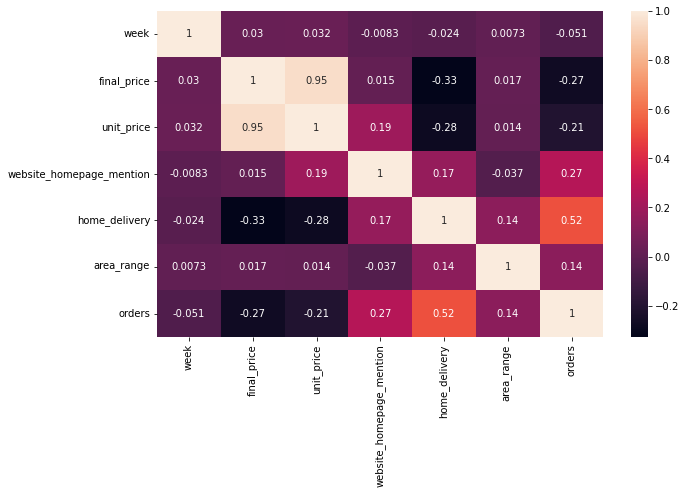

In [218]:
plt.figure(figsize = (10,6))

sns.heatmap(df.corr(),annot=True);

Unit_Price and Final_price are highly correlated. Should you drop any one of the variables?

In [219]:
# # Dropping Unit_price 
# df.drop(['unit_price'], axis = 1,inplace=True)
# sns.heatmap(df.corr(),annot=True)

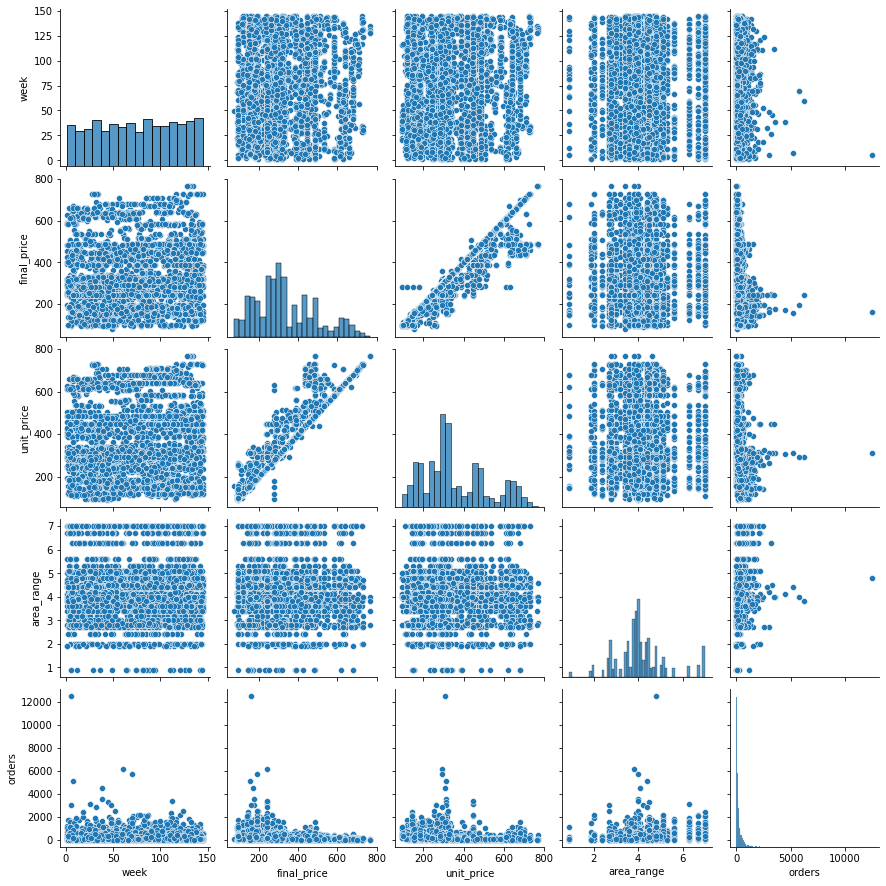

In [62]:
sns.pairplot(df,vars=num);

#### get_dummies

In [220]:
df =pd.get_dummies(df, columns=cat,drop_first=True)

In [221]:
df.head()

,week,final_price,unit_price,area_range,orders,website_homepage_mention_1.0,food_category_Biryani,food_category_Desert,food_category_Extras,food_category_Other Snacks,...,food_category_Rice Bowl,food_category_Salad,food_category_Sandwich,food_category_Seafood,food_category_Soup,food_category_Starters,cuisine_Indian,cuisine_Italian,home_delivery_1.0,night_service_1
0,122.0,150.35,152.35,7.0,972,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,95.0,484.03,485.03,5.6,150,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,52.0,281.33,281.33,3.0,55,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,10.0,167.81,196.94,4.0,256,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
4,122.0,212.46,256.14,3.4,82,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


### Outlier Check and treatment?

### Scaling the continuous variables

In [222]:
#Scales the data. Essentially returns the z-scores of every attribute

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [223]:
df['week'] = std_scale.fit_transform(df[['week']])
df['final_price'] = std_scale.fit_transform(df[['final_price']])
df['area_range'] = std_scale.fit_transform(df[['area_range']])
df['unit_price'] = std_scale.fit_transform(df[['unit_price']])

In [224]:
df

,week,final_price,unit_price,area_range,orders,website_homepage_mention_1.0,food_category_Biryani,food_category_Desert,food_category_Extras,food_category_Other Snacks,...,food_category_Rice Bowl,food_category_Salad,food_category_Sandwich,food_category_Seafood,food_category_Soup,food_category_Starters,cuisine_Indian,cuisine_Italian,home_delivery_1.0,night_service_1
0,1.129633,-1.214360,-1.279540,2.646971,972,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0.485767,0.975087,0.795450,1.365920,150,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,-0.539649,-0.354932,-0.475067,-1.013174,55,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,-1.541219,-1.099796,-1.001424,-0.098138,256,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
4,1.129633,-0.806824,-0.632182,-0.647159,82,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1.606571,1.013275,1.188705,-1.013174,109,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,-1.135822,-0.361494,-0.481304,-0.189641,162,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3997,-0.372721,-0.042867,-0.184663,-0.006634,473,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3998,1.201174,-0.354932,-0.468830,0.633891,379,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1


### Train-Test Split

In [225]:
df.columns

Index(['week', 'final_price', 'unit_price', 'area_range', 'orders',
       'website_homepage_mention_1.0', 'food_category_Biryani',
       'food_category_Desert', 'food_category_Extras',
       'food_category_Other Snacks', 'food_category_Pasta',
       'food_category_Pizza', 'food_category_Rice Bowl', 'food_category_Salad',
       'food_category_Sandwich', 'food_category_Seafood', 'food_category_Soup',
       'food_category_Starters', 'cuisine_Indian', 'cuisine_Italian',
       'home_delivery_1.0', 'night_service_1'],
      dtype='object')

In [226]:
# Copy all the predictor variables into X dataframe
X = df.drop('orders', axis=1)

# Copy target into the y dataframe. 
y = np.log(df[['orders']])

In [227]:
X.head()

,week,final_price,unit_price,area_range,website_homepage_mention_1.0,food_category_Biryani,food_category_Desert,food_category_Extras,food_category_Other Snacks,food_category_Pasta,...,food_category_Rice Bowl,food_category_Salad,food_category_Sandwich,food_category_Seafood,food_category_Soup,food_category_Starters,cuisine_Indian,cuisine_Italian,home_delivery_1.0,night_service_1
0,1.129633,-1.214360,-1.279540,2.646971,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0.485767,0.975087,0.795450,1.365920,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,-0.539649,-0.354932,-0.475067,-1.013174,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,-1.541219,-1.099796,-1.001424,-0.098138,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
4,1.129633,-0.806824,-0.632182,-0.647159,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [228]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=50)

### Linear Regression Model

In [229]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [230]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for week is -0.010000490147799692
The coefficient for final_price is -0.548774719295396
The coefficient for unit_price is 0.2176441051089218
The coefficient for area_range is 0.18592029940182722
The coefficient for website_homepage_mention_1.0 is 0.30506798844366
The coefficient for food_category_Biryani is -0.21923972046068216
The coefficient for food_category_Desert is 0.39049679359223394
The coefficient for food_category_Extras is -0.2610294519256866
The coefficient for food_category_Other Snacks is -0.4855428243413517
The coefficient for food_category_Pasta is -0.810037733530671
The coefficient for food_category_Pizza is 0.38627922816784527
The coefficient for food_category_Rice Bowl is 1.5243047456076337
The coefficient for food_category_Salad is 0.13495171227473785
The coefficient for food_category_Sandwich is 0.2530587391366872
The coefficient for food_category_Seafood is -0.17597321915713623
The coefficient for food_category_Soup is -0.9765389959122566
The coeff

In [231]:
regression_model.coef_

array([[-0.01000049, -0.54877472,  0.21764411,  0.1859203 ,  0.30506799,
        -0.21923972,  0.39049679, -0.26102945, -0.48554282, -0.81003773,
         0.38627923,  1.52430475,  0.13495171,  0.25305874, -0.17597322,
        -0.976539  , -0.4073168 , -1.06131099,  0.03753024,  1.05554201,
        -0.00726836]])

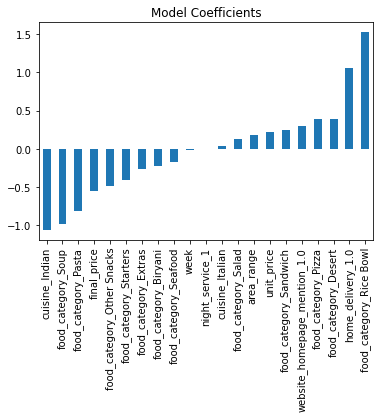

In [232]:
#checking the magnitude of coefficients
predictors = X_train.columns

coef = pd.Series(regression_model.coef_.flatten(), predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients');

In [233]:
# R square on training data
regression_model.score(X_train, y_train)

0.7429673690887416

In [234]:
# R square on testing data
regression_model.score(X_test, y_test)

0.744757089991462

In [235]:
from sklearn import metrics

In [236]:
## RMSE Check on the training and Test Data

RMSE_lr_train = metrics.mean_squared_error(y_true = y_train, y_pred=regression_model.predict(X_train),squared=False)
RMSE_lr_test = metrics.mean_squared_error(y_true = y_test, y_pred=regression_model.predict(X_test), squared=False)

In [237]:
resultsDf = pd.DataFrame({'Train RMSE': [RMSE_lr_train],'Test RMSE': [RMSE_lr_test]},index=['LinearRegression'])
resultsDf

,Train RMSE,Test RMSE
LinearRegression,0.609283,0.62558


# Regularization

### Ridge Regression

1. Value of alpha, which is hyperparameter of Ridge, which means that they are not automatically learned by the model instead they have to be set manually. We run a grid search for otimum alpha values
2. To find optimum alpha for Ridge Regularization we are applying GridSearchCV

In [285]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, LeaveOneOut

# ridge=Ridge()
# parameters={'alpha':[1e-1,1e-2,1e-3]}
# ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=None)
# ridge_regressor.fit(X_train,y_train)
## Predict on the training data using the GridSearchCV method

#ridge_regressor.best_estimator_.predict(X_train)

In [259]:
from sklearn.linear_model import RidgeCV

In [275]:
model = RidgeCV(alphas=(list(np.arange(0.01,0.1,0.005))),scoring='neg_mean_squared_error',cv=LeaveOneOut())

In [276]:
model.fit(X_train,y_train)

RidgeCV(alphas=array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095]),
        cv=LeaveOneOut(), scoring='neg_mean_squared_error')

In [283]:
model.alpha_

0.09499999999999999

In [286]:
## Training Data R-square
model.score(X_train,y_train)

0.7429671132419827

In [284]:
model.predict(X_train)

array([[4.43771645],
       [6.663164  ],
       [3.94512996],
       ...,
       [6.08680433],
       [4.06349835],
       [3.49524641]])

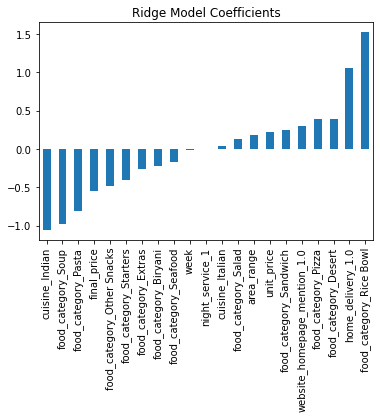

In [287]:
# ridgeReg = Ridge(alpha=0.1)

# ridgeReg.fit(X_train,y_train)

#checking the magnitude of coefficients
# predictors = X_train.columns

coef_ridge = pd.Series(model.coef_.flatten(), predictors).sort_values()

coef_ridge.plot(kind='bar', title='Ridge Model Coefficients');

In [288]:
## RMSE Check on the training and Test Data

RMSE_rr_train = metrics.mean_squared_error(y_true = y_train, y_pred=model.predict(X_train),squared=False)
RMSE_rr_test = metrics.mean_squared_error(y_true = y_test, y_pred=model.predict(X_test), squared=False)

In [289]:
resultsDf_2 = pd.DataFrame({'Train RMSE': [RMSE_rr_train],'Test RMSE': [RMSE_rr_test]},index=['RidgeRegression'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Train RMSE,Test RMSE
LinearRegression,0.609283,0.625580
RidgeRegression,0.609283,0.625598


### Lasso regression

In [311]:
#Optimizing for alpha
from sklearn.linear_model import Lasso,LassoCV
lasso=Lasso()
parameters={'alpha':[1e-10,1e-9,1e-8,1e10,1e9,1e8]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=LeaveOneOut(),n_jobs=-1)

lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=LeaveOneOut(), estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-10, 1e-09, 1e-08, 10000000000.0,
                                   1000000000.0, 100000000.0]},
             scoring='neg_mean_squared_error')

In [312]:
print(lasso_regressor.best_params_)

{'alpha': 1e-08}


In [310]:
# lasso_regressor.cv_results_

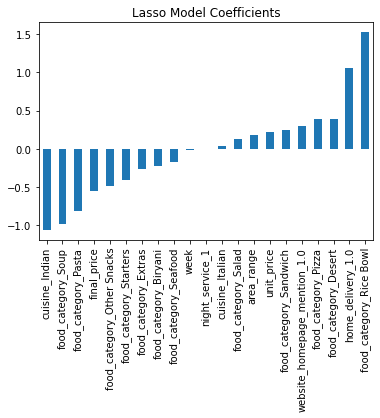

In [313]:


lassoReg = Lasso(alpha=1e-8)

lassoReg.fit(X_train,y_train)

# pred1 = lassoReg.predict(X_test)


coef_lasso = pd.Series(lassoReg.coef_.flatten(), predictors).sort_values()

coef_lasso.plot(kind='bar', title='Lasso Model Coefficients');

In [314]:
# get Lasso coefficient and print them 
Lasso_coefficient = pd.DataFrame() 
Lasso_coefficient["Columns"]= X_train.columns 
Lasso_coefficient['Coefficient Estimate'] = pd.Series(lassoReg.coef_) 
print(Lasso_coefficient) 

                         Columns  Coefficient Estimate
0                           week             -0.010000
1                    final_price             -0.548774
2                     unit_price              0.217644
3                     area_range              0.185920
4   website_homepage_mention_1.0              0.305068
5          food_category_Biryani             -0.219240
6           food_category_Desert              0.390497
7           food_category_Extras             -0.261029
8     food_category_Other Snacks             -0.485542
9            food_category_Pasta             -0.810037
10           food_category_Pizza              0.386279
11       food_category_Rice Bowl              1.524304
12           food_category_Salad              0.134952
13        food_category_Sandwich              0.253059
14         food_category_Seafood             -0.175973
15            food_category_Soup             -0.976538
16        food_category_Starters             -0.407316
17        

In [315]:
print(lassoReg.score(X_train,y_train))
print(lassoReg.score(X_test,y_test))

0.7429673690886986
0.7447570801068207


In [316]:
## RMSE Check on the training and Test Data

RMSE_la_train = metrics.mean_squared_error(y_true = y_train, y_pred=lasso_regressor.best_estimator_.predict(X_train),squared=False)
RMSE_la_test = metrics.mean_squared_error(y_true = y_test, y_pred=lasso_regressor.best_estimator_.predict(X_test), squared=False)

In [317]:
resultsDf_2 = pd.DataFrame({'Train RMSE': [RMSE_la_train],'Test RMSE': [RMSE_la_test]},index=['LassoRegression'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Train RMSE,Test RMSE
LinearRegression,0.609283,0.625580
RidgeRegression,0.609283,0.625598
LassoRegression,0.609283,0.625580


### Elastic Net Regression

In [321]:
from sklearn.linear_model import ElasticNet
Elasticnet=ElasticNet()
parameters={'alpha':[1e-10,1e-9,1e-8,1e10,1e9,1e8],
            'l1_ratio':[0.100,0.189,0.278,0.367,0.456,0.544,0.633,0.722,0.811,0.900]}
Elasticnet_regressor=GridSearchCV(Elasticnet,parameters,scoring='neg_mean_squared_error',cv=LeaveOneOut(),n_jobs=-1)

Elasticnet_regressor.fit(X_train,y_train)

GridSearchCV(cv=LeaveOneOut(), estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1e-10, 1e-09, 1e-08, 10000000000.0,
                                   1000000000.0, 100000000.0],
                         'l1_ratio': [0.1, 0.189, 0.278, 0.367, 0.456, 0.544,
                                      0.633, 0.722, 0.811, 0.9]},
             scoring='neg_mean_squared_error')

In [323]:
Elasticnet_regressor.best_params_

{'alpha': 1e-08, 'l1_ratio': 0.1}

In [324]:
ENreg = ElasticNet(alpha=1e-08, l1_ratio=0.1)

ENreg.fit(X_train,y_train)

pred_test = ENreg.predict(X_test)

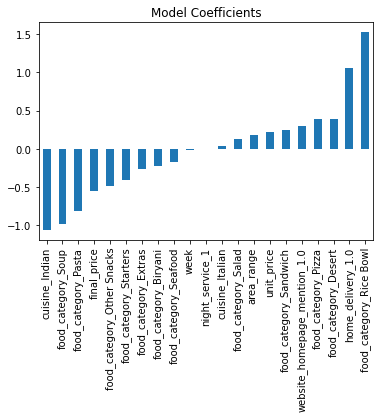

In [325]:
coef = pd.Series(ENreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients');

In [326]:
# get ElasticNet coefficient and print them 
Elasticnet_coefficient = pd.DataFrame() 
Elasticnet_coefficient["Columns"]= X_train.columns 
Elasticnet_coefficient['Coefficient Estimate'] = pd.Series(ENreg.coef_) 
print(Elasticnet_coefficient)

                         Columns  Coefficient Estimate
0                           week             -0.010000
1                    final_price             -0.548774
2                     unit_price              0.217644
3                     area_range              0.185920
4   website_homepage_mention_1.0              0.305068
5          food_category_Biryani             -0.219240
6           food_category_Desert              0.390496
7           food_category_Extras             -0.261029
8     food_category_Other Snacks             -0.485542
9            food_category_Pasta             -0.810037
10           food_category_Pizza              0.386279
11       food_category_Rice Bowl              1.524304
12           food_category_Salad              0.134952
13        food_category_Sandwich              0.253059
14         food_category_Seafood             -0.175973
15            food_category_Soup             -0.976538
16        food_category_Starters             -0.407316
17        

In [328]:
## RMSE Check on the training and Test Data

RMSE_en_train = metrics.mean_squared_error(y_true = y_train, y_pred=Elasticnet_regressor.best_estimator_.predict(X_train),squared=False)
RMSE_en_test = metrics.mean_squared_error(y_true = y_test, y_pred=Elasticnet_regressor.best_estimator_.predict(X_test), squared=False)

In [329]:
resultsDf_2 = pd.DataFrame({'Train RMSE': [RMSE_en_train],'Test RMSE': [RMSE_en_test]},index=['ElasticNetRegression'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Train RMSE,Test RMSE
LinearRegression,0.609283,0.625580
RidgeRegression,0.609283,0.625598
LassoRegression,0.609283,0.625580
ElasticNetRegression,0.609283,0.625580
